**Colab Link:** https://colab.research.google.com/drive/1aAK0RUoNdfv3p0xfOwLIC8zysSid1Jmw?usp=sharing

Importing required libraries

In [ ]:
import numpy as np
import networkx as nx
from collections import defaultdict
import matplotlib.pyplot as plt

Defining list of cities being used for example.

In [ ]:
cities = [
    "New York", "Los Angeles", "Chicago", "Houston", "Phoenix",
    "Philadelphia", "San Antonio", "San Diego", "Dallas", "San Jose",
    "Austin", "Miami", "Fort Worth", "Columbus", "San Francisco",
    "Charlotte", "Indianapolis", "Seattle", "Denver", "Washington DC"
]

## Breadth First Search Algorithm

- Creating and Assigning Input

In [ ]:
# Creating new undirected graph for BFS
G_bfs = nx.Graph()
G_bfs.add_nodes_from(cities)

# Creating same graph every time the code is run
np.random.seed(0)

# Randomly connecting the cities for BFS
for city in cities:
    connections = np.random.choice(cities, size=np.random.randint(1, 6), replace=False)
    for conn in connections:
        if city != conn:
            G_bfs.add_edge(city, conn)

- Taking a peek at the connections

In [ ]:
print("Nodes and Edges in the Graph:")
for node in G_bfs.nodes():
    edge_list = [f"({node}, {neighbor})" for neighbor in G_bfs.neighbors(node)]
    print(f"Node {node} is connected to:")
    for edge in edge_list:
        print(edge)

Nodes and Edges in the Graph:
Node New York is connected to:
(New York, Dallas)
(New York, Columbus)
(New York, Fort Worth)
(New York, Los Angeles)
(New York, Miami)
(New York, San Francisco)
Node Los Angeles is connected to:
(Los Angeles, New York)
(Los Angeles, San Antonio)
(Los Angeles, Phoenix)
(Los Angeles, Seattle)
(Los Angeles, Washington DC)
Node Chicago is connected to:
(Chicago, Columbus)
(Chicago, Indianapolis)
(Chicago, Washington DC)
Node Houston is connected to:
(Houston, Denver)
(Houston, Dallas)
(Houston, Columbus)
(Houston, Indianapolis)
(Houston, Phoenix)
(Houston, San Jose)
(Houston, Charlotte)
Node Phoenix is connected to:
(Phoenix, Houston)
(Phoenix, San Jose)
(Phoenix, Denver)
(Phoenix, San Diego)
(Phoenix, Los Angeles)
(Phoenix, Columbus)
(Phoenix, Washington DC)
Node Philadelphia is connected to:
(Philadelphia, Dallas)
(Philadelphia, San Antonio)
(Philadelphia, Fort Worth)
(Philadelphia, Indianapolis)
(Philadelphia, Washington DC)
Node San Antonio is connected t

- Grapical representation of the input

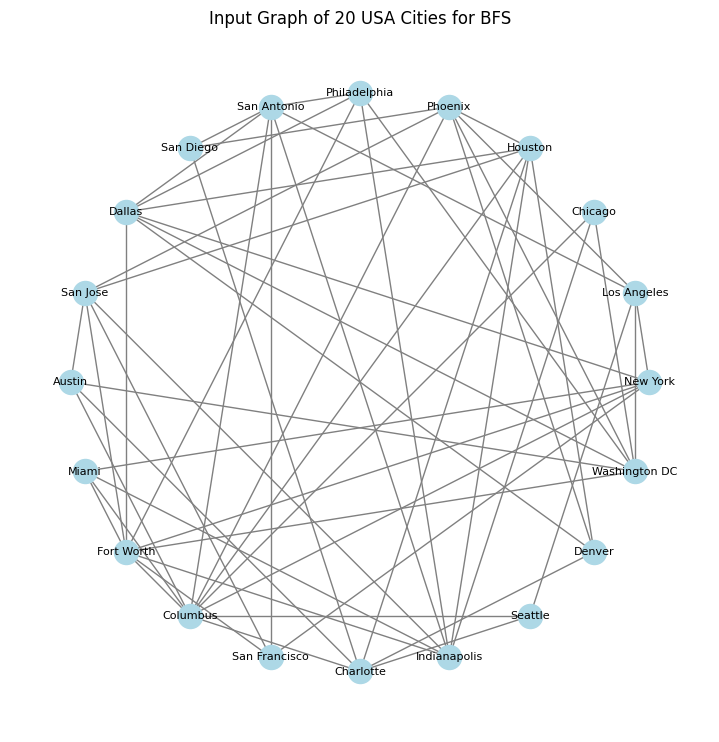

In [ ]:
# Plotting the BFS graph
plt.figure(figsize=(7, 7))
nx.draw_circular(G_bfs, with_labels=True, node_color='lightblue', edge_color='gray', font_size=8)
plt.title("Input Graph of 20 USA Cities for BFS")

plt.savefig('/content/drive/My Drive/plot_bfs.png')
plt.show()

- Function definition for breadth first search algorithm

In [ ]:
def bfs(graph, start):
    visited = {key: False for key in cities}
    queue = []
    result = []

    queue.append(start)
    visited[start] = True

    while queue:
        node = queue.pop(0)
        result.append(node)

        for neighbor in graph[node]:
            if not visited[neighbor]:
                queue.append(neighbor) # appending nodes from left to right
                visited[neighbor] = True

    return result

start_node = "Miami"
print(G_bfs)
bfs_result = bfs(G_bfs, start_node)
print("Breadth-First Traversal (starting from {})".format(start_node))
print(bfs_result)


Graph with 20 nodes and 57 edges
Breadth-First Traversal (starting from Miami)
['Miami', 'New York', 'Indianapolis', 'Fort Worth', 'Columbus', 'Dallas', 'Los Angeles', 'San Francisco', 'Houston', 'Philadelphia', 'San Jose', 'Chicago', 'San Antonio', 'Washington DC', 'Seattle', 'Austin', 'Charlotte', 'Phoenix', 'Denver', 'San Diego']


- Visualizing output

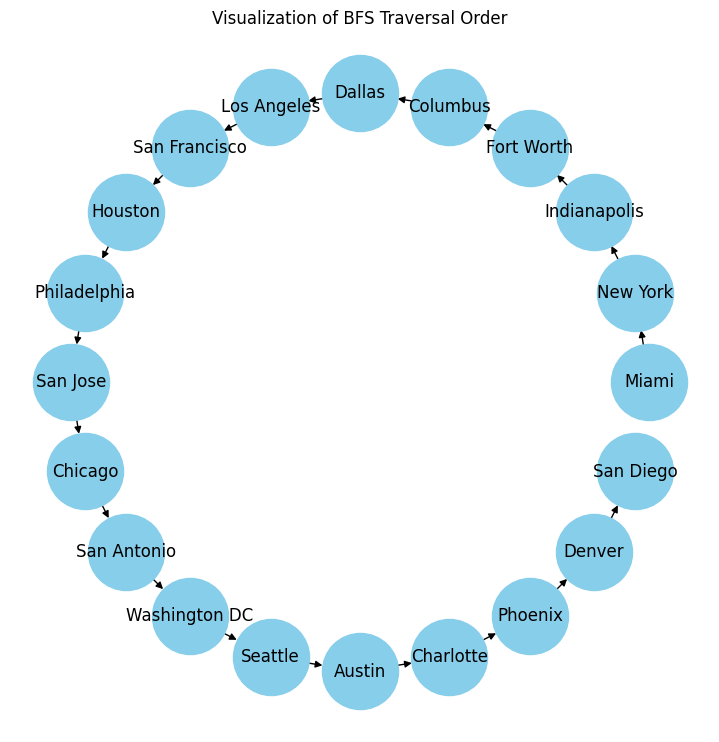

In [ ]:
import matplotlib.pyplot as plt

# Creating a directed graph to represent the BFS result
bfs_visual = nx.DiGraph()

# Adding edges based on the BFS traversal order
for i in range(len(bfs_result) - 1):
    bfs_visual.add_edge(bfs_result[i], bfs_result[i + 1])

# Plotting the graph
plt.figure(figsize=(7, 7))
pos = nx.circular_layout(bfs_visual)
nx.draw(bfs_visual, pos, with_labels=True, node_size=3000, node_color="skyblue", arrows=True)
plt.title("Visualization of BFS Traversal Order")

plt.savefig('/content/drive/My Drive/bfs_output.png')
plt.show()

## Bellman Ford Algorithm

- creating and assigning a graph as input

In [ ]:
# Creating a new directed graph for Bellman-Ford
G_bf = nx.DiGraph()
G_bf.add_nodes_from(cities)

# Creating same graph every time the code is run
np.random.seed(0)

# Randomly assigning distances and connecting cities
for city in cities:
    connections = np.random.choice(cities, size=np.random.randint(1, 6), replace=False)
    for conn in connections:
        if city != conn:
            distance = np.random.randint(50, 1000)  # Random distance between 50 and 1000 miles
            G_bf.add_edge(city, conn, weight=distance)

- Taking a peek at the connections and their weights

In [ ]:
count = 0

# Print the edges and their attributes (weights in this case)
print("\nEdges and their respective weights:")

for edge in G_bf.edges(data=True):
    source, target, attributes = edge
    weight = attributes['weight']
    print(f"Edge: {source} -> {target}, Weight: {weight}")
    count += 1

print(f'There are {count} number of edges in the graph')


Edges and their respective weights:
Edge: New York -> Dallas, Weight: 137
Edge: New York -> Columbus, Weight: 224
Edge: New York -> Fort Worth, Weight: 650
Edge: New York -> Los Angeles, Weight: 899
Edge: New York -> Miami, Weight: 727
Edge: Los Angeles -> Phoenix, Weight: 689
Edge: Los Angeles -> Fort Worth, Weight: 594
Edge: Chicago -> Washington DC, Weight: 371
Edge: Chicago -> Fort Worth, Weight: 987
Edge: Chicago -> Charlotte, Weight: 107
Edge: Houston -> Los Angeles, Weight: 896
Edge: Houston -> Chicago, Weight: 193
Edge: Houston -> Columbus, Weight: 710
Edge: Houston -> Indianapolis, Weight: 277
Edge: Phoenix -> San Antonio, Weight: 418
Edge: Phoenix -> Austin, Weight: 967
Edge: Phoenix -> Dallas, Weight: 251
Edge: San Antonio -> Austin, Weight: 144
Edge: San Antonio -> Denver, Weight: 276
Edge: San Antonio -> Indianapolis, Weight: 925
Edge: San Diego -> Charlotte, Weight: 975
Edge: Dallas -> Charlotte, Weight: 399
Edge: Dallas -> Columbus, Weight: 179
Edge: San Jose -> Miami, 

- graphical representation of the input

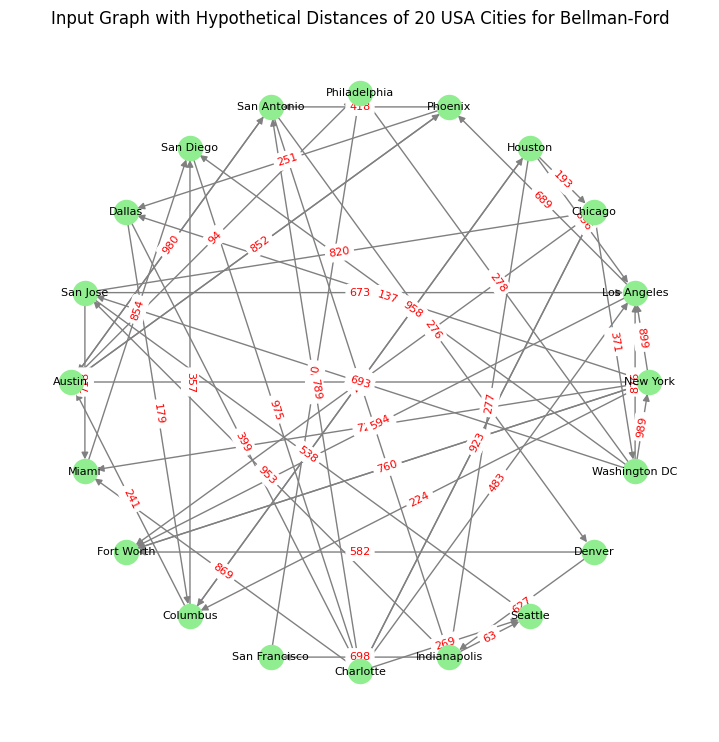

In [ ]:
# Plotting the Bellman-Ford graph with distances
plt.figure(figsize=(7, 7))

pos = nx.circular_layout(G_bf)
nx.draw_circular(G_bf, with_labels=True, node_color='lightgreen', edge_color='gray', font_size=8)
edge_labels = nx.get_edge_attributes(G_bf, 'weight')
nx.draw_networkx_edge_labels(G_bf, pos, edge_labels=edge_labels, font_color='red', font_size=8)

plt.title("Input Graph with Hypothetical Distances of 20 USA Cities for Bellman-Ford")
plt.savefig('/content/drive/My Drive/plot_bf.png')
plt.show()


- Function definition for bellman ford algorithm

In [ ]:
def bellman_ford(graph, start):
    distance = {vertex: float('infinity') for vertex in graph}
    predecessor = {vertex: None for vertex in graph}

    distance[start] = 0

    for _ in range(len(graph) - 1):
        for node in graph:
            for neighbour, weight in graph[node].items():
                if distance[neighbour] > distance[node] + weight['weight']:
                    distance[neighbour] = distance[node] + weight['weight']
                    predecessor[neighbour] = node

    # Check for negative weight cycles
    for node in graph:
        for neighbour, weight in graph[node].items():
            if distance[neighbour] > distance[node] + weight['weight']:
                return "Negative weight cycle detected"

    return distance, predecessor

source_vertex = "Miami"
bf_distances, bf_predecessors = bellman_ford(G_bf, source_vertex)
for key, value in bf_distances.items():
  if value != 0:
    print(f"Bellman-Ford distance from {source_vertex} to {key} is {value} miles")

Bellman-Ford distance from Miami to New York is 3666 miles
Bellman-Ford distance from Miami to Los Angeles is 2312 miles
Bellman-Ford distance from Miami to Chicago is 2752 miles
Bellman-Ford distance from Miami to Houston is 3676 miles
Bellman-Ford distance from Miami to Phoenix is 3001 miles
Bellman-Ford distance from Miami to Philadelphia is 2856 miles
Bellman-Ford distance from Miami to San Antonio is 2618 miles
Bellman-Ford distance from Miami to San Diego is 854 miles
Bellman-Ford distance from Miami to Dallas is 3252 miles
Bellman-Ford distance from Miami to San Jose is 3816 miles
Bellman-Ford distance from Miami to Austin is 2762 miles
Bellman-Ford distance from Miami to Fort Worth is 2906 miles
Bellman-Ford distance from Miami to Columbus is 3431 miles
Bellman-Ford distance from Miami to San Francisco is 4219 miles
Bellman-Ford distance from Miami to Charlotte is 1829 miles
Bellman-Ford distance from Miami to Indianapolis is 3521 miles
Bellman-Ford distance from Miami to Seatt

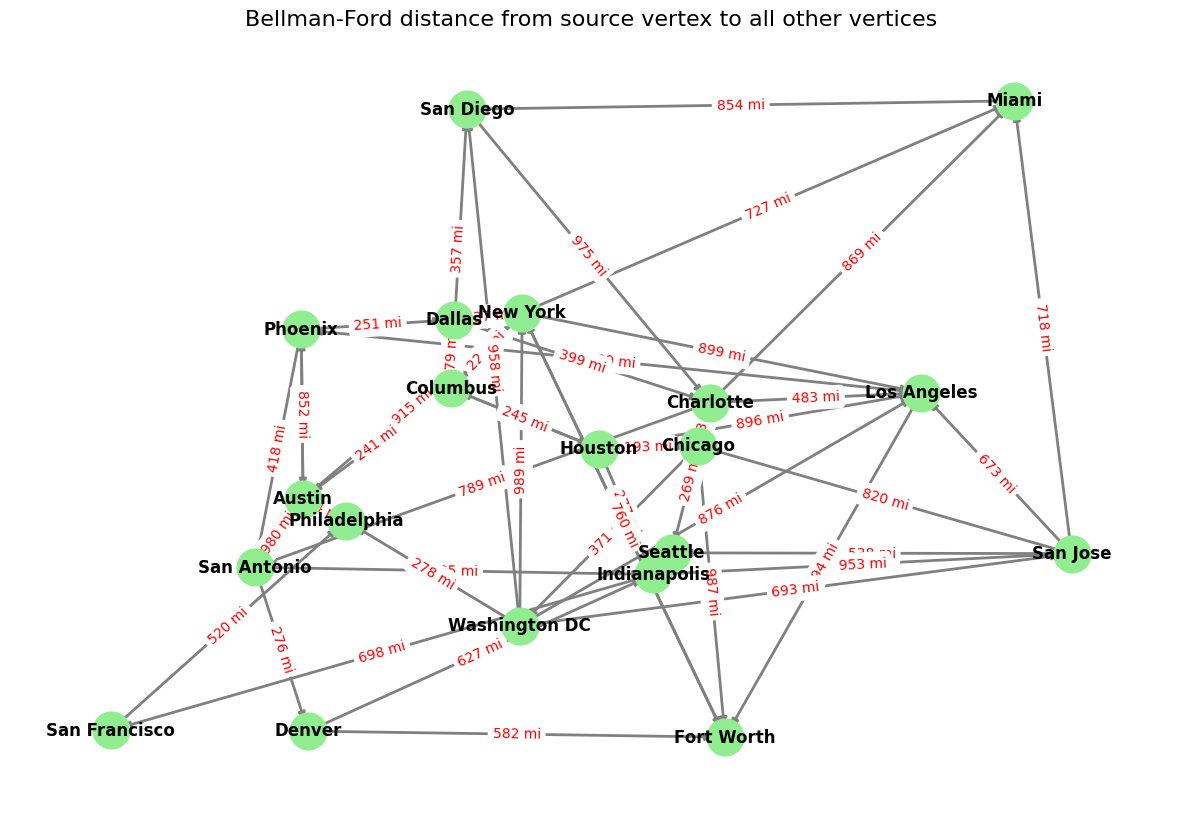

In [ ]:
pos = nx.kamada_kawai_layout(G_bf)
plt.figure(figsize=(15, 10))  #Big size than rest of the graphs for better visibility

nx.draw_networkx_nodes(G_bf, pos, nodelist=[n for n in cities], node_color='lightgreen', node_size=700)
nx.draw_networkx_edges(G_bf, pos, edgelist=G_bf.edges(), edge_color='gray', width=2)
nx.draw_networkx_labels(G_bf, pos, font_size=12, font_weight='bold', font_family="sans-serif")
edge_labels = {(u, v): f"{d['weight']} mi" for u, v, d in G_bf.edges(data=True)}
nx.draw_networkx_edge_labels(G_bf, pos, edge_labels=edge_labels, font_color='red')

plt.title("Bellman-Ford distance from source vertex to all other vertices", fontsize=16)
plt.axis('off')
plt.savefig('/content/drive/My Drive/bf_output.png')
plt.show()